<a href="https://colab.research.google.com/github/paolayela/Talento-TECH/blob/main/Actividad2_6_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Cargamos el conjunto de datos
datos_cifar = keras.datasets.cifar10
(datos_entrenamiento_x, datos_entrenamiento_y), (datos_prueba_x, datos_prueba_y) = datos_cifar.load_data()

print(datos_entrenamiento_x.shape)
print(datos_prueba_x.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
#Normalizar los datos
datos_entrenamiento_x = datos_entrenamiento_x / 255
datos_prueba_x = datos_prueba_x / 255

#creacion del modelo
model=keras.Sequential([
    keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
                        ])

In [ ]:
#compilacion del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

#Entrenamiento del modelo
history=model.fit(datos_entrenamiento_x, datos_entrenamiento_y, epochs=5, batch_size=100)

Epoch 1/5
500/500 [==============================] - 90s 177ms/step - loss: 1.6272 - accuracy: 0.4073
Epoch 2/5
500/500 [==============================] - 87s 174ms/step - loss: 1.3037 - accuracy: 0.5371
Epoch 3/5
500/500 [==============================] - 80s 160ms/step - loss: 1.1713 - accuracy: 0.5899
Epoch 4/5
500/500 [==============================] - 85s 171ms/step - loss: 1.0766 - accuracy: 0.6249
Epoch 5/5
292/500 [================>.............] - ETA: 33s - loss: 1.0163 - accuracy: 0.6473

In [ ]:
#graficamos el entrenamiento
pd.DataFrame(history.history).plot(grid=True)

In [ ]:
#evaluar el modelo en el conjunto de prueba y en el conjunto de entrenamiento
loss, acuracy=model.evaluate(datos_entrenamiento_x, datos_entrenamiento_y)
print(f'perdida en el conjunto de entrenamiento: {loss}')
print(f'Precision en el conjunto de entrenamiento: {acuracy}')

loss,accuracy = model.evaluate(datos_prueba_x, datos_prueba_y)
print("Perdida en el conjunto de Prueba: ", loss)
print("Acertacion en el conjunto de Prueba:", accuracy)

1563/1563 [==============================] - 25s 16ms/step - loss: 0.9811 - accuracy: 0.6524
perdida en el conjunto de entrenamiento: 0.9810785055160522
Precision en el conjunto de entrenamiento: 0.6523600220680237
313/313 [==============================] - 4s 14ms/step - loss: 1.0416 - accuracy: 0.6299
Perdida en el conjunto de Prueba:  1.0415576696395874
Acertacion en el conjunto de Prueba: 0.6298999786376953


In [ ]:
#Prediccion
index=1
print(f'label {datos_prueba_y[index]}')
clasificacion=model.predict(datos_prueba_x[index:index+1])
print(f'prediccion: {(clasificacion.reshape(-1,1))}')

label [8]
1/1 [==============================] - 0s 76ms/step
prediccion: [[1.3555384e-01]
 [6.6170621e-01]
 [1.1887442e-03]
 [1.5844353e-05]
 [6.5369772e-05]
 [3.2674848e-06]
 [6.8260251e-06]
 [4.1820618e-05]
 [1.9767007e-01]
 [3.7480181e-03]]


1/1 [==============================] - 0s 22ms/step


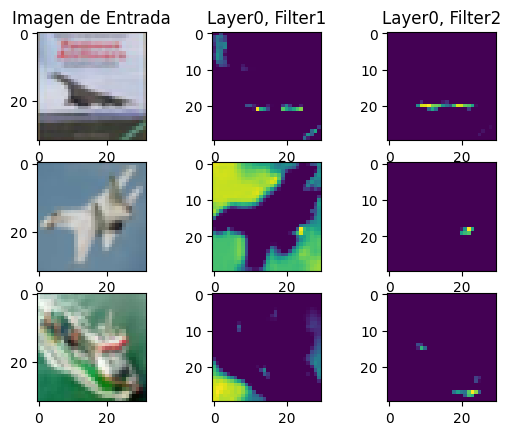

In [ ]:
#seleccion de imagenes de interes
FIRST_IMAGE=3
SECOND_IMAGE=10
THIRD_IMAGE=15

layer=0
filter1=5
filter2=10

layer_ouput=[layer.output for layer in model.layers]
activation_model=keras.models.Model(inputs=model.input, outputs=layer_ouput)

#Visualizacion de la capa convolucional
f, axarr=plt.subplots(3,3)

axarr[0,0].set_title('Imagen de Entrada')
axarr[0,0].imshow(datos_prueba_x[FIRST_IMAGE])
f1=activation_model.predict(datos_prueba_x[FIRST_IMAGE].reshape(1,32,32,3))[layer]
axarr[0,1].set_title('Layer'+ str(layer)+', Filter1')
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title('Layer'+ str(layer)+', Filter2')
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(datos_prueba_x[SECOND_IMAGE])
f1=activation_model.predict(datos_prueba_x[SECOND_IMAGE].reshape(1,32,32,3))[layer]
axarr[1,1].imshow(f1[0,:,:,filter1])
axarr[1,2].imshow(f1[0,:,:,filter2])

axarr[2,0].imshow(datos_prueba_x[THIRD_IMAGE])
f1=activation_model.predict(datos_prueba_x[THIRD_IMAGE].reshape(1,32,32,3))[layer]
axarr[2,1].imshow(f1[0,:,:,filter1])
axarr[2,2].imshow(f1[0,:,:,filter2])

313/313 [==============================] - 6s 19ms/step


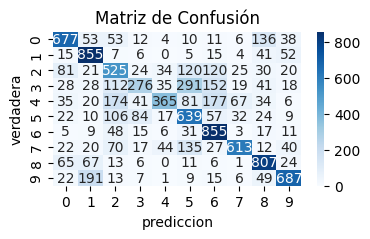

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
#prediccion
prediccion_label=np.argmax(model.predict(datos_prueba_x), axis=1) # Predict on the entire test set

#matriz de confusion
confusion=confusion_matrix(datos_prueba_y,prediccion_label)

plt.figure(figsize=(4, 2))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
#plt.imshow(confusion,interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('prediccion')
plt.ylabel('verdadera')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
#f1
f1=f1_score(datos_prueba_y,prediccion_label, average='weighted')
print("F1-Score:", f1)

F1-Score: 0.6187847730941913


In [ ]:
# Reporte de clasificación (incluye precision, recall y f1-score para cada clase)
report = classification_report(datos_prueba_y, prediccion_label)
print("Reporte de clasificación:\n", report)

# Distribución de errores
errors = prediccion_label != datos_prueba_y
error_indices = np.where(errors)[0]

print(f"Total de errores: {len(error_indices)}")
print(f"Indices de errores: {error_indices}")

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69      1000
           1       0.67      0.85      0.75      1000
           2       0.47      0.53      0.50      1000
           3       0.57      0.28      0.37      1000
           4       0.72      0.36      0.48      1000
           5       0.48      0.64      0.55      1000
           6       0.60      0.85      0.70      1000
           7       0.79      0.61      0.69      1000
           8       0.68      0.81      0.74      1000
           9       0.76      0.69      0.72      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.62     10000
weighted avg       0.64      0.63      0.62     10000

Total de errores: 90000000
Indices de errores: [   0    0    0 ... 9999 9999 9999]


--------------------------------------------------------------------

MODELO UTILIZANDO EL CONJUNTO DE DATOS CIFAR100

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Cargamos el conjunto de datos
datos_cifar = keras.datasets.cifar100
(datos_entrenamiento_x, datos_entrenamiento_y), (datos_prueba_x, datos_prueba_y) = datos_cifar.load_data()

print(datos_entrenamiento_x.shape)
print(datos_prueba_x.shape)
print(datos_entrenamiento_y[:10])

(50000, 32, 32, 3)
(10000, 32, 32, 3)
[[19]
 [29]
 [ 0]
 [11]
 [ 1]
 [86]
 [90]
 [28]
 [23]
 [31]]


In [ ]:
#Normalizar los datos
datos_entrenamiento_x = datos_entrenamiento_x / 255
datos_prueba_x = datos_prueba_x / 255

#creacion del modelo
model=keras.Sequential([
    keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100)
                        ])

In [ ]:
#compilacion del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

#Entrenamiento del modelo
history=model.fit(datos_entrenamiento_x, datos_entrenamiento_y, epochs=10,validation_data=(datos_prueba_x, datos_prueba_y))

Epoch 1/10
1563/1563 [==============================] - 148s 94ms/step - loss: 6.5064 - accuracy: 0.0101 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 2/10
1563/1563 [==============================] - 147s 94ms/step - loss: 4.6051 - accuracy: 0.0100 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 3/10
1563/1563 [==============================] - 146s 94ms/step - loss: 4.6051 - accuracy: 0.0100 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 4/10
1563/1563 [==============================] - 144s 92ms/step - loss: 4.6051 - accuracy: 0.0100 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 5/10
1563/1563 [==============================] - 149s 96ms/step - loss: 4.6051 - accuracy: 0.0100 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 6/10
1563/1563 [==============================] - 140s 89ms/step - loss: 4.6051 - accuracy: 0.0100 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 7/10
1563/1563 [==============================] - 145s 93ms/step - loss: 4.6051 - accuracy: 0.0100 - val_loss: 4

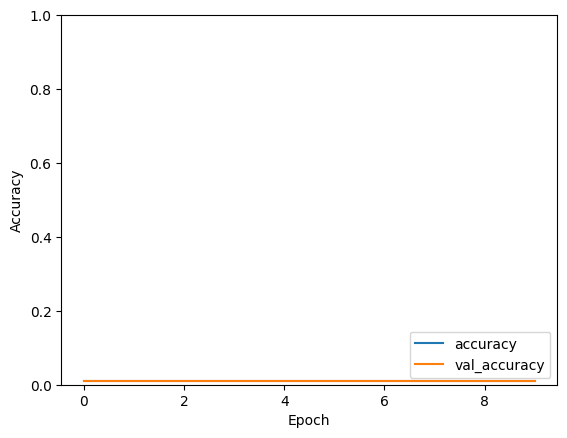

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
#evaluar el modelo en el conjunto de prueba y en el conjunto de entrenamiento
loss, acuracy=model.evaluate(datos_entrenamiento_x, datos_entrenamiento_y)
print(f'perdida en el conjunto de entrenamiento: {loss}')
print(f'Precision en el conjunto de entrenamiento: {acuracy}')

loss,accuracy = model.evaluate(datos_prueba_x, datos_prueba_y)
print("Perdida en el conjunto de Prueba: ", loss)
print("Acertacion en el conjunto de Prueba:", accuracy)

1563/1563 [==============================] - 28s 18ms/step - loss: 4.6051 - accuracy: 0.0112
perdida en el conjunto de entrenamiento: 4.605111122131348
Precision en el conjunto de entrenamiento: 0.011219999752938747
313/313 [==============================] - 4s 14ms/step - loss: 4.6052 - accuracy: 0.0114
Perdida en el conjunto de Prueba:  4.60518217086792
Acertacion en el conjunto de Prueba: 0.01140000019222498


In [ ]:
#Prediccion
index=1
print(f'label {datos_prueba_y[index]}')
clasificacion=model.predict(datos_prueba_x[index:index+1])
print(f'prediccion: {(clasificacion.reshape(-1,1))}')

label [33]
1/1 [==============================] - 0s 185ms/step
prediccion: [[-0.2632883 ]
 [-0.49644148]
 [-0.7683119 ]
 [-0.71365416]
 [-0.9113752 ]
 [-0.795265  ]
 [-0.42860967]
 [-0.91899854]
 [-0.77339053]
 [-0.41401958]
 [-0.68168706]
 [-0.58723354]
 [-0.494131  ]
 [-0.17532706]
 [-0.20695622]
 [-0.28258842]
 [-0.9689065 ]
 [-0.2774973 ]
 [-0.6186449 ]
 [-0.60991436]
 [-0.49944723]
 [-0.6210727 ]
 [-0.7920774 ]
 [-1.0652201 ]
 [-1.0062696 ]
 [-0.7110579 ]
 [-0.39176017]
 [-0.612056  ]
 [-0.36198437]
 [-0.49665147]
 [-0.46848243]
 [-0.7447658 ]
 [-0.30968603]
 [-0.65571487]
 [-0.32636094]
 [-0.5598272 ]
 [-0.54397804]
 [-0.55891734]
 [-0.6138468 ]
 [-0.20319113]
 [-0.14809065]
 [-0.56126654]
 [-0.8244869 ]
 [-0.5930334 ]
 [-0.71686774]
 [-0.23809151]
 [-0.71766067]
 [-0.4424004 ]
 [-0.34704542]
 [-0.37530842]
 [-0.69860536]
 [-0.5501626 ]
 [-0.86193466]
 [-0.3130108 ]
 [-0.36261377]
 [-1.0610259 ]
 [-0.88627934]
 [-0.5028706 ]
 [-0.24855107]
 [-0.46325752]
 [-0.40744632]
 [-0.7438

1/1 [==============================] - 0s 41ms/step


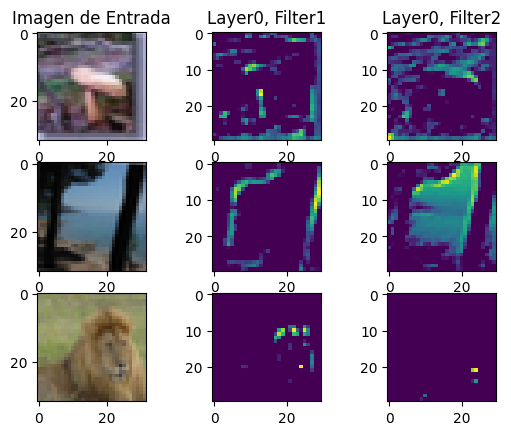

In [ ]:
#seleccion de imagenes de interes
FIRST_IMAGE=3
SECOND_IMAGE=10
THIRD_IMAGE=15

layer=0
filter1=3
filter2=8

layer_ouput=[layer.output for layer in model.layers]
activation_model=keras.models.Model(inputs=model.input, outputs=layer_ouput)

#Visualizacion de la capa convolucional
f, axarr=plt.subplots(3,3)

axarr[0,0].set_title('Imagen de Entrada')
axarr[0,0].imshow(datos_prueba_x[FIRST_IMAGE])
f1=activation_model.predict(datos_prueba_x[FIRST_IMAGE].reshape(1,32,32,3))[layer]
axarr[0,1].set_title('Layer'+ str(layer)+', Filter1')
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title('Layer'+ str(layer)+', Filter2')
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(datos_prueba_x[SECOND_IMAGE])
f1=activation_model.predict(datos_prueba_x[SECOND_IMAGE].reshape(1,32,32,3))[layer]
axarr[1,1].imshow(f1[0,:,:,filter1])
axarr[1,2].imshow(f1[0,:,:,filter2])

axarr[2,0].imshow(datos_prueba_x[THIRD_IMAGE])
f1=activation_model.predict(datos_prueba_x[THIRD_IMAGE].reshape(1,32,32,3))[layer]
axarr[2,1].imshow(f1[0,:,:,filter1])
axarr[2,2].imshow(f1[0,:,:,filter2])

313/313 [==============================] - 4s 13ms/step


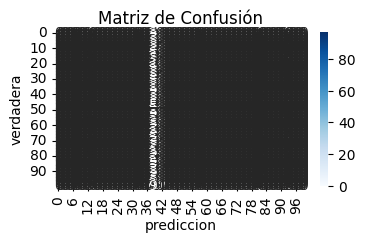

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
#prediccion
prediccion_label=np.argmax(model.predict(datos_prueba_x), axis=1) # Predict on the entire test set

#matriz de confusion
confusion=confusion_matrix(datos_prueba_y,prediccion_label)

plt.figure(figsize=(4, 2))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
#plt.imshow(confusion,interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('prediccion')
plt.ylabel('verdadera')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
#f1
f1=f1_score(datos_prueba_y,prediccion_label, average='weighted')
print("F1-Score:", f1)

F1-Score: 0.0010419730997640645


In [ ]:
# Reporte de clasificación (incluye precision, recall y f1-score para cada clase)
report = classification_report(datos_prueba_y, prediccion_label)
print("Reporte de clasificación:\n", report)

# Distribución de errores
errors = prediccion_label != datos_prueba_y
error_indices = np.where(errors)[0]

print(f"Total de errores: {len(error_indices)}")
print(f"Indices de errores: {error_indices}")

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       100
          13       0.01      0.03      0.02       100
          14       0.00      0.00      0.00       100
          15       0.00      0.00      0.00       100
          16       0.00      0.00      0.00       100


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Total de errores: 99000000
Indices de errores: [   0    0    0 ... 9999 9999 9999]


Epoch 1/10
1563/1563 [==============================] - 87s 55ms/step - loss: 3.9471 - accuracy: 0.0956 - val_loss: 3.5574 - val_accuracy: 0.1598
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 3.2818 - accuracy: 0.2047 - val_loss: 3.1030 - val_accuracy: 0.2413
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 2.9708 - accuracy: 0.2646 - val_loss: 2.8886 - val_accuracy: 0.2815
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 2.7699 - accuracy: 0.3013 - val_loss: 2.7763 - val_accuracy: 0.3132
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 2.6169 - accuracy: 0.3321 - val_loss: 2.6727 - val_accuracy: 0.3222
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 2.4988 - accuracy: 0.3572 - val_loss: 2.6179 - val_accuracy: 0.3418
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 2.3974 - accuracy: 0.3803 - val_loss: 2.5787 -

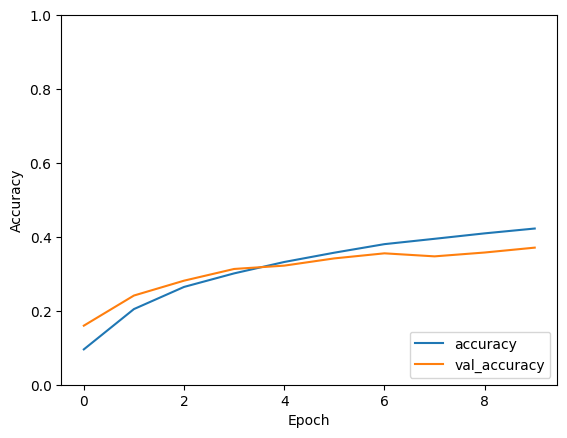

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Cargar el conjunto de datos CIFAR-100
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

# Normalizar las imágenes a valores entre 0 y 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Definir la arquitectura de la CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(100))

# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Visualizar el historial de entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
